# Big Mart Sales Prediction

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#to avoid truncation of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

##  PROBLEM STATEMENT

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

In [2]:
#storing the train dataset to a dataframe named 'data'
data=pd.read_csv('train_v9rqX0R.csv')

In [3]:
#displaying the first few rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

There are 8523 observations and 12 features in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#descriptive statistics
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#descriptive statistics
data.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


# 1. Exploratory Data Analysis

## 1.1 Univariate Analysis

### 1.1.1 Distribution of numerical features

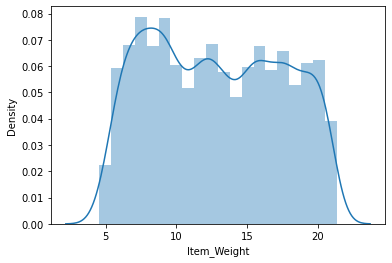

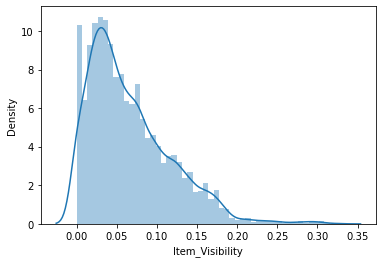

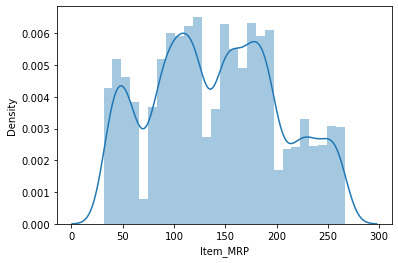

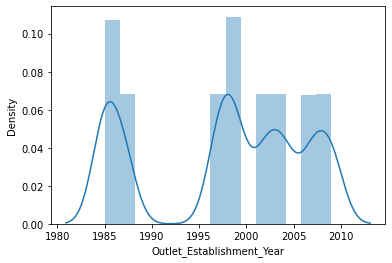

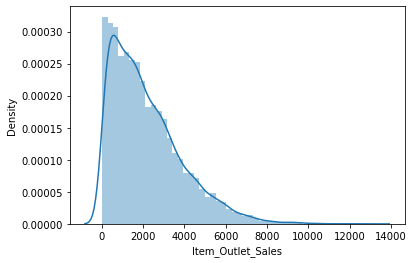

In [8]:
for i in data.describe().columns:
    sns.distplot(data[i].dropna())
    plt.show()

The above gives the distribution of various numerical features in the train dataset. We can make the following inferences:
>>> Most of the Item_Weights are distributed between 5 and 20.
>>> Items MRPs are distributed around 40 and 260.
>>> Regarding the outlet establishment year, we can see that there were no outlets established around 1990-1995.The last outlet
    was established somewhere around 2009.
>>> Most of the outlet sales of the items are between 0 and 8000.

### 1.1.2 Distribution of categorical features

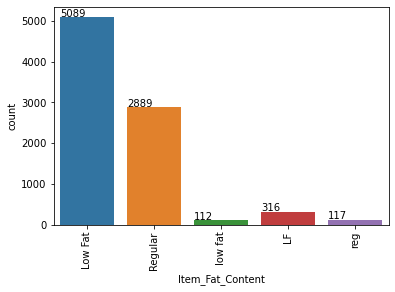

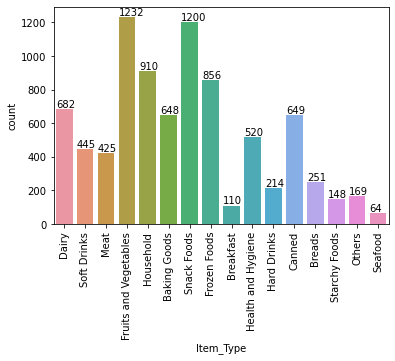

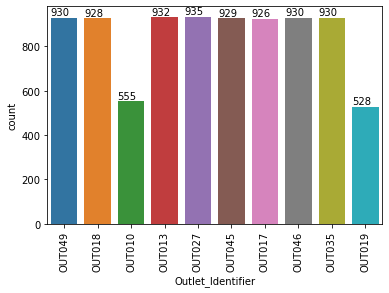

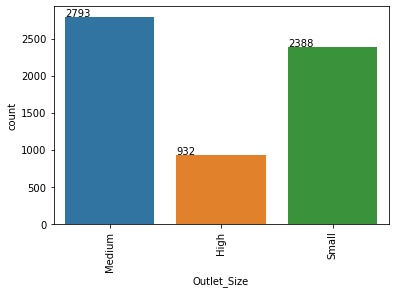

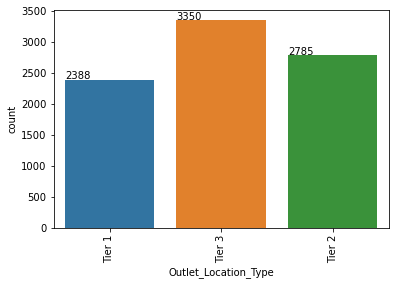

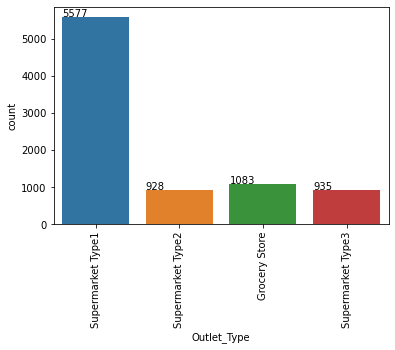

In [9]:
for i in data.describe(include=object).columns.drop('Item_Identifier'):
    fig=sns.countplot(data[i].dropna())
    plt.xticks(rotation=90)
    #to get the count displayed on the chart
    for p in fig.patches:
        fig.annotate(round(p.get_height(),2) , (p.get_x(), p.get_height()+10))
    plt.show()

The following inferences can be made:
>>>Fruits and Vegetables are having highest count followed by SnackFoods and Household items respectively. The items having lesser counts are Seafood,Starchy Foods amd breakfast items. This seems quiet reasonable  because most of the buyers come to buy essential things like fruits and vegetables, dairy and other household items.
>>>Most of the outlet size is 'Medium' followed by 'small' category. Less than 1000 outlets come under the category 'High'.
>>>Most of the outlet location is 'Tier 3' followed by 'Tier 2' category. 
>>>Most of the outlet type is 'Supermarket Type 1'

### 1.1.3 Distribution of Outlet_Establishment_Year

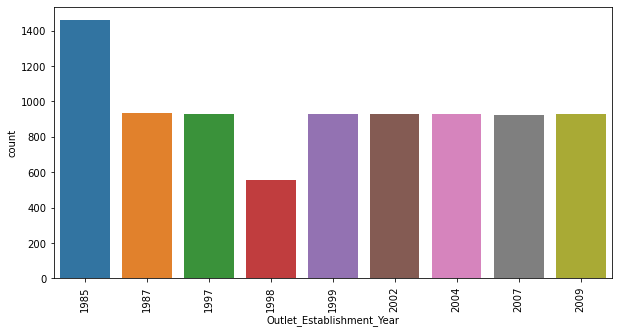

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data.Outlet_Establishment_Year)
plt.xticks(rotation=90)
plt.show()

Highest number of outlets were established in the year 1985 and it was low in 1998. From 1999 onwards the established outlet counts followed a uniform pattern till 2009.

### 1.1.4 Distribution of Outlet_Type

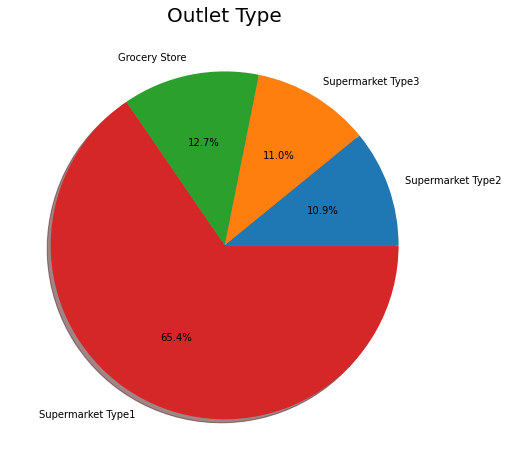

In [11]:
Outlet_Type = data.Outlet_Type.value_counts(ascending=True).values
plt.figure(figsize=(8,8))
plt.pie(Outlet_Type, labels=['Supermarket Type2','Supermarket Type3','Grocery Store','Supermarket Type1'], autopct='%1.1f%%', shadow=True)
plt.title('Outlet Type', fontsize=20)
plt.show()

## 1.2 Bivariate Analysis

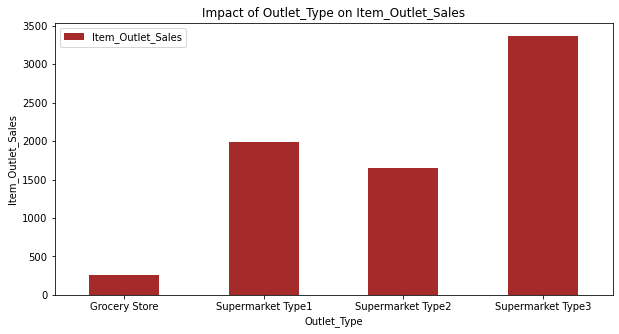

In [12]:
Item_Type_pivot = \
data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(10,5))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

From the analysis, Supermarket Type3 category has the highest number of sales followed by 'Supermarket1' and 'Supermarket2' respectively.

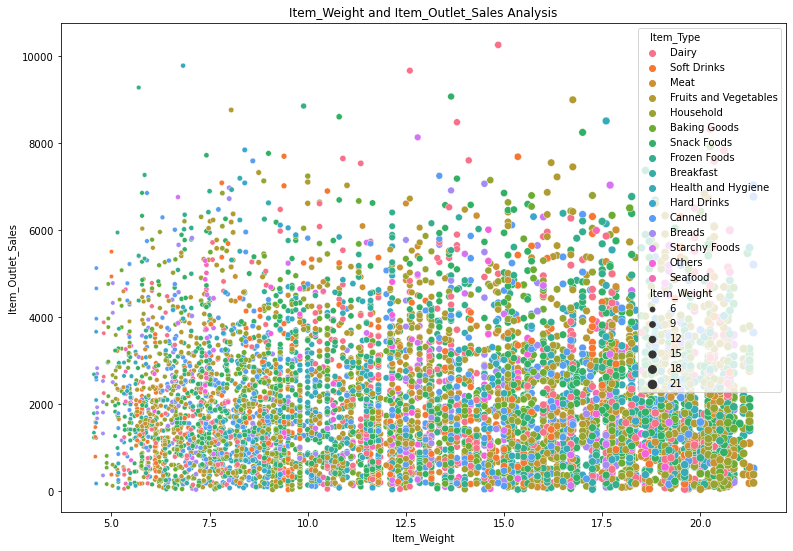

In [13]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=data)
plt.show()

From the analysis, we can infer that there is not much correlation between item weight and the outlets sales.That means sales of any item has no relationship with the weight of the item.

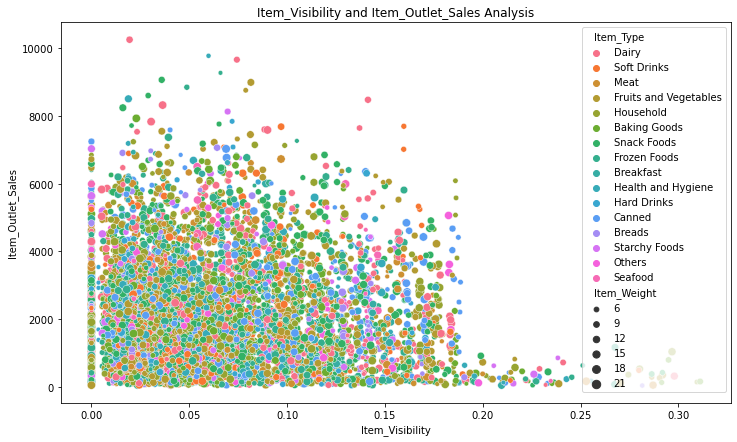

In [14]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=data)
plt.show()

Here, we can see that most of the items are clustered around low visibility region but still they have high outlet sales. Also the outller sales of high visibility item are low.

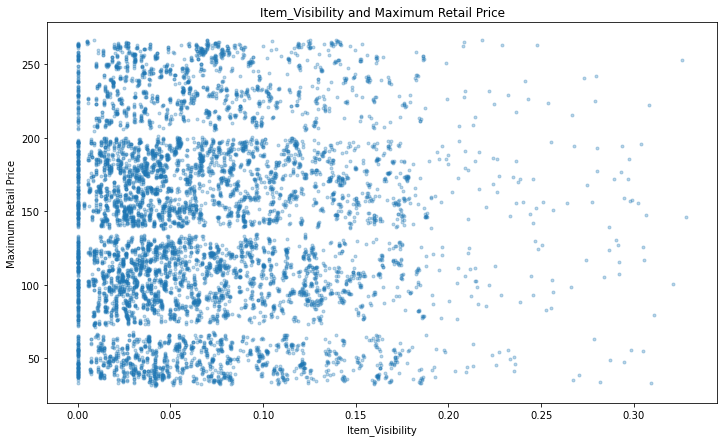

In [15]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(data.Item_Visibility, data.Item_MRP, ".",alpha = 0.3)
plt.show()

Another inference is that low visibility items have the maximum retail price

## 1.3 Multivariate Analysis

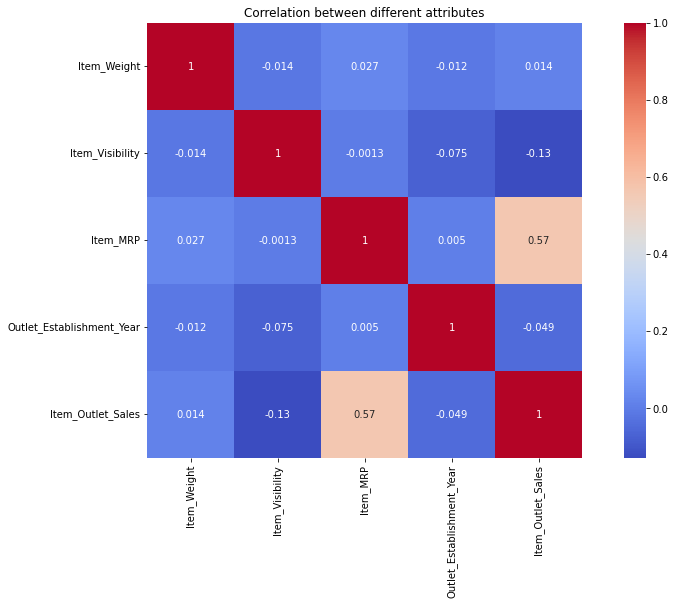

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),vmax=1, square=True,annot=True, cmap='coolwarm')
plt.title('Correlation between different attributes')
plt.show()

From the heatmap analysis,

>>> Higher the visibility, lower the sales of the product
>>> Very less correlation exists between item weight and outlet establishment year, item weight and item visibility,
    otlet sales etc.
>>> Item weight and item MRP has very low positive correaltion

# 2. Pre-processing

## 2.1 Handling null values

In [17]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are null values in two features.<br>'Item_Weight' and 'Outlet_Size'

### 2.1.1 Handling null values in 'Item_Weight'

In [18]:
#displaying item details
data[['Item_Identifier','Item_Weight']].sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
8043,DRA12,11.600
118,DRA12,11.600
1693,DRA12,11.600
1197,DRA12,11.600
1245,DRA12,11.600
7467,DRA12,11.600
8195,DRA24,19.350
6863,DRA24,19.350
2879,DRA24,NaN
4416,DRA24,NaN


It can be observed that, items with the same identifier have similar weights.

In [19]:
#creating a dictionary with item identifier as key and item_weight as value
item_weight_dict={}
for item in set(data['Item_Identifier']):
    item_weight_dict[item]=data['Item_Weight'][data['Item_Identifier']==item].mean()

The missing weights are filled from the dictionary.

In [20]:
for ind in data[data['Item_Weight'].isnull()==True].index:
    data['Item_Weight'][ind]=item_weight_dict[data['Item_Identifier'][ind]]

In [21]:
data[data['Item_Weight'].isnull()==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


The above items have unique identifiers. Their weight will be almost equal to items of similar type, fat_content and MRP.

In [22]:
data['Item_Weight'][927]=data['Item_Weight'][(data['Item_Type']=='Frozen Foods') & (data['Item_Fat_Content']=='Regular') & (data['Item_MRP']>85)& (data['Item_MRP']<90)].mean()
data['Item_Weight'][1922]=data['Item_Weight'][(data['Item_Type']=='Snack Foods') & (data['Item_Fat_Content']=='Low Fat') & (data['Item_MRP']>118)& (data['Item_MRP']<122)].mean()
data['Item_Weight'][4187]=data['Item_Weight'][(data['Item_Type']=='Dairy') & (data['Item_Fat_Content']=='Regular') & (data['Item_MRP']>85)& (data['Item_MRP']<90)].mean()
data['Item_Weight'][5022]=data['Item_Weight'][(data['Item_Type']=='Baking Goods') & (data['Item_Fat_Content']=='Regular') & (data['Item_MRP']>119)& (data['Item_MRP']<123)].mean()

### 2.1.2 Handling null values in 'Outlet_Size'

In [23]:
data['Outlet_Identifier'][data['Outlet_Size'].isnull()==True].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

The missing data are from three outlets.

They can be filled with the mode value.

In [24]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [25]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 2.2 Handling outliers

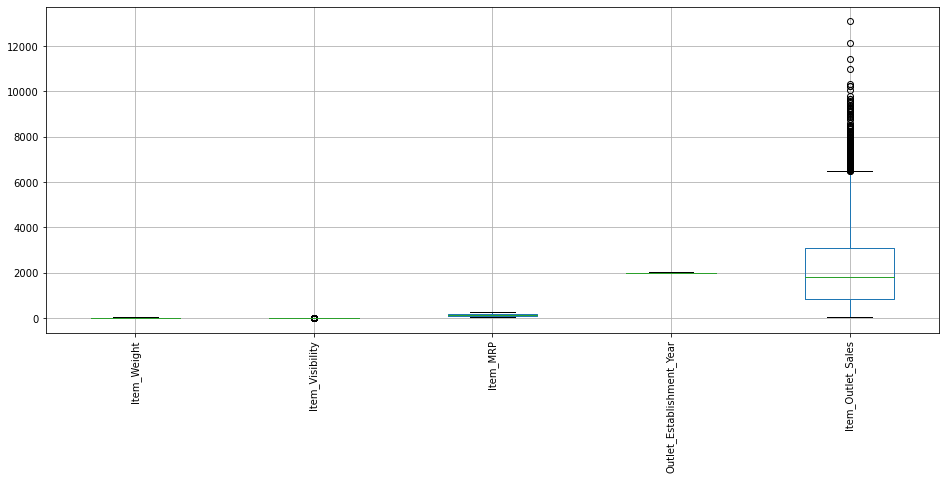

In [26]:
#selecting the integer datatype features
data_int = data.select_dtypes(include=['int64','float64'])
data_int.boxplot(figsize = (16,6))
plt.xticks(rotation=90)
plt.show()

There are outliers in the feature 'Item_Visibility'.

In [27]:
#defining a function to handle outliers
def outlier_check(col):
    #calculating percentiles
    Q1=np.percentile(data[col],25,interpolation='midpoint')
    Q2=np.percentile(data[col],50,interpolation='midpoint')
    Q3=np.percentile(data[col],75,interpolation='midpoint')
    print('Q1 = ',round(Q1,3),'\nQ2 = ',round(Q2,3),'\nQ3 = ',round(Q3,3))

    #calculating inter quartile range
    IQR=Q3-Q1
    print('IQR = ',round(IQR,3))

    #calculating the upper and lower limit of outliers
    low_lim=Q1-(1.5*IQR)
    up_lim=Q3+(1.5*IQR)
    print('Upper limit = ',round(up_lim,3),'\nLower limit = ',round(low_lim,3))

    #creating a list of outliers
    outlier=[]
    for x in data[col]:
        if (x>up_lim or x<low_lim):
            outlier.append(round(x,3))
    print('Outliers are :',outlier)

In [28]:
outlier_check('Item_Visibility')

Q1 =  0.027 
Q2 =  0.054 
Q3 =  0.095
IQR =  0.068
Upper limit =  0.196 
Lower limit =  -0.074
Outliers are : [0.255, 0.293, 0.279, 0.292, 0.205, 0.264, 0.229, 0.298, 0.233, 0.21, 0.22, 0.328, 0.205, 0.247, 0.214, 0.227, 0.223, 0.267, 0.256, 0.244, 0.255, 0.225, 0.224, 0.246, 0.236, 0.27, 0.205, 0.321, 0.248, 0.274, 0.208, 0.196, 0.235, 0.241, 0.196, 0.304, 0.232, 0.216, 0.198, 0.213, 0.238, 0.222, 0.295, 0.284, 0.235, 0.309, 0.277, 0.213, 0.254, 0.204, 0.237, 0.206, 0.213, 0.228, 0.232, 0.305, 0.292, 0.243, 0.298, 0.326, 0.266, 0.209, 0.256, 0.247, 0.273, 0.208, 0.2, 0.225, 0.21, 0.308, 0.245, 0.268, 0.218, 0.211, 0.233, 0.293, 0.29, 0.253, 0.22, 0.28, 0.216, 0.198, 0.202, 0.305, 0.215, 0.295, 0.198, 0.212, 0.287, 0.216, 0.212, 0.302, 0.286, 0.2, 0.245, 0.251, 0.29, 0.226, 0.236, 0.247, 0.238, 0.209, 0.224, 0.239, 0.209, 0.297, 0.305, 0.2, 0.208, 0.291, 0.24, 0.211, 0.256, 0.199, 0.216, 0.21, 0.205, 0.28, 0.197, 0.214, 0.205, 0.237, 0.222, 0.244, 0.286, 0.311, 0.226, 0.199, 0.282, 0.2

As 'Item_Visibility' denotes the % of total display area of all products in a store allocated to the particular product, it can never go beyond 100%.


Hence, the outliers can be capped to the upper limit of outliers.

In [29]:
for ind in data.loc[(data['Item_Visibility']>0.196 )].index:
    data['Item_Visibility'][ind]=0.196

## 2.3 Feature Engineering

As we can see, in the outlet establishment year category,the established years are given as they are.Since these are
high values they can affect the model performance.In order to avoid this we can create a new attribute.The dataset is
collected in 2013 and so we can find the duration of the year for establishing each outlet by negating each establishment year
from 2013.

In [30]:
#creating a new feature to find the age of the outlet in '2013'
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [31]:
data.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [32]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
# The labels of  the feature 'Item_Fat_Content' can be grouped into low fat and regular (Combining repeared labels)
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Closely examining the item category we can define three categories like food,drink and nonconsumables

In [34]:
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2]) # To get the first two letters from the feature
data['New_Item_Type'].value_counts()

FD    6125
NC    1599
DR     799
Name: New_Item_Type, dtype: int64

In [35]:
# If a product is non-consumable there is no need to associate fat content to them
#So it can be changed to another category 'non edible'

data.loc[data['New_Item_Type']=='NC', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [36]:
data.drop('New_Item_Type',axis=1,inplace=True)

## 2.4 Encoding

In [37]:
#descriptive statistics
data.describe(include=object)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,3,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,3918,1232,935,5203,3350,5577


### 2.4.1 Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
lab_enc_state=LabelEncoder()
for col in ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Fat_Content']:
    lab_enc_state.fit(data[col])
    data[col]=lab_enc_state.transform(data[col])

### 2.4.2 Encoding Outlet_Size

In [39]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [40]:
# mapping 'Outlet_Size' feature
data['Outlet_Size'] =data['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})
data['Outlet_Size'].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

### 2.4.3 Encoding Outlet_Location_Type

In [41]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [42]:
# mapping 'Outlet_Location_Type' feature
data['Outlet_Location_Type'] =data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})
data['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

## 2.5 Feature Scaling

In [43]:
#dependent variable is stored in y
y=data['Item_Outlet_Sales']
#independent variable is stored in x
x=data.drop(['Item_Outlet_Sales'],axis=1) 
x.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.875002,0.892995,0.065307,7.226681,140.992782,4.722281,0.829168,2.112871,1.201220,15.168133
std,449.222377,4.645352,0.895005,0.048842,4.209990,62.275067,2.837201,0.600327,0.812757,0.796459,8.371760
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,1.000000,0.000000,4.000000
25%,395.500000,8.785000,0.000000,0.026989,4.000000,93.826500,2.000000,0.000000,1.000000,1.000000,9.000000
50%,783.000000,12.650000,1.000000,0.053931,6.000000,143.012800,5.000000,1.000000,2.000000,1.000000,14.000000
75%,1167.000000,16.850000,2.000000,0.094585,10.000000,185.643700,7.000000,1.000000,3.000000,1.000000,26.000000
max,1558.000000,21.350000,2.000000,0.196000,15.000000,266.888400,9.000000,2.000000,3.000000,3.000000,28.000000


In [44]:
#min max scaling
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler()
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.500459,0.495386,0.446498,0.333201,0.481779,0.465635,0.524698,0.414584,0.556436,0.400407,0.465339
std,0.288333,0.276591,0.447503,0.249195,0.280666,0.264327,0.315245,0.300164,0.406379,0.265486,0.348823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253851,0.251861,0.000000,0.137701,0.266667,0.265437,0.222222,0.000000,0.000000,0.333333,0.208333
50%,0.502567,0.481989,0.500000,0.275158,0.400000,0.474209,0.555556,0.500000,0.500000,0.333333,0.416667
75%,0.749037,0.732063,1.000000,0.482578,0.666667,0.655156,0.777778,0.500000,1.000000,0.333333,0.916667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Modelling

In [45]:
#splitting the dataset for training the model and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

## 3.1 Linear Regression Model

In [46]:
#Linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error
MSE_lin_reg=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the linear regression model is ',round(MSE_lin_reg,3))

Mean of squared errors of the linear regression model is  1292111.648


## 3.2 Polynomial Regression Model

In [48]:
#polynomial regression model with degree 2
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)

#converting feature matrix into polynomial feature matrix
x_poly= poly_regs.fit_transform(x_train)  
poly =linear_model.LinearRegression()  
model=poly.fit(x_train, y_train) 
predictions=model.predict(x_test)

In [49]:
MSE_poly_reg2=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the Polynomial regression model is ',round(MSE_poly_reg2,3))

Mean of squared errors of the Polynomial regression model is  1292111.648


In [50]:
#polynomial regression model with degree 5
poly_regs= PolynomialFeatures(degree= 5)  
x_poly= poly_regs.fit_transform(x_train)  
poly =linear_model.LinearRegression()  
model=poly.fit(x_train, y_train) 
predictions=model.predict(x_test)

In [51]:
MSE_poly_reg5=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the linear Polynomial model is ',round(MSE_poly_reg5,3))

Mean of squared errors of the linear Polynomial model is  1292111.648


## 3.3 Ridge Regression Model

In [52]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.016,normalize=True)
model=ridge_reg.fit(x_train, y_train)
predictions = model.predict(x_test)

In [53]:
MSE_ridg_reg=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the Ridge regression model is ',round(MSE_ridg_reg,3))

Mean of squared errors of the Ridge regression model is  1293064.666


## 3.4 LASSO Regression Model

In [54]:
from sklearn.linear_model import Lasso
lasso = Lasso()
model=lasso.fit(x_train, y_train)
predictions = model.predict(x_test)

In [55]:
MSE_lasso=mean_squared_error(predictions,y_test)
print('Mean of squared errors of the LASSO regression model is ',round(MSE_lasso,3))

Mean of squared errors of the LASSO regression model is  1291363.089


## 3.5 Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt_model=dt.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)

In [57]:
MSE_Deci=mean_squared_error(dt_pred,y_test)
print('Mean of squared errors of the LASSO regression model is ',round(MSE_Deci,3))

Mean of squared errors of the LASSO regression model is  2347445.917


## 3.6 Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [59]:
MSE_rf=mean_squared_error(rf_pred,y_test)
print('Mean of squared errors of the LASSO regression model is ',round(MSE_rf,3))

Mean of squared errors of the LASSO regression model is  1173901.116


# Summary

In [60]:
print('MSE values for different models:\n')
print('Linear Regression Model : ',round(MSE_lin_reg))
print('Polynomial Regression Model(Degree = 2) : ',round(MSE_poly_reg2))
print('Polynomial Regression Model(Degree = 5) : ',round(MSE_poly_reg5))
print('Ridge Regression Model : ',round(MSE_ridg_reg))
print('Lasso Regression Model : ',round(MSE_lasso))
print('Decision Tree : ',round(MSE_Deci))
print('Random Forest : ',round(MSE_rf))

MSE values for different models:

Linear Regression Model :  1292112
Polynomial Regression Model(Degree = 2) :  1292112
Polynomial Regression Model(Degree = 5) :  1292112
Ridge Regression Model :  1293065
Lasso Regression Model :  1291363
Decision Tree :  2347446
Random Forest :  1173901


Random Forest is found to give the best results. Hence, fine tuning the model.

# 4. Hyperparameter Finetuning

In [61]:
#number of trees in the forest
n_estimators=[100,150,200]
#maximum depth of the tree
max_depth=[4,5,6,7]
#minimum number of samples required to split an internal node
min_samples_split=[2,3,4]
#number of features to consider when looking for the best split
max_features=['sqrt','log2', None]

In [62]:
# Create the param grid
param_grid = {
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'max_features':max_features
}

In [63]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, verbose=2,n_jobs=4,cv=3)

In [64]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [65]:
rf_Grid.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_split': 4,
 'n_estimators': 200}

In [66]:
rf=RandomForestRegressor(max_depth=5,max_features=None,min_samples_split=3,n_estimators=200)
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
MSE_rf=mean_squared_error(rf_pred,y_test)
print('Mean of squared errors of the LASSO regression model is ',round(MSE_rf,3))

Mean of squared errors of the LASSO regression model is  1038447.451


The MSE value has reduced after fine tuning.

# 5. Preprocessing the test data

In [67]:
#storing the test dataset to a dataframe named 'test'
test=pd.read_csv('test_AbJTz2l.csv')

In [68]:
#displaying the first few rows
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## 5.1 Handling null values

In [69]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [70]:
#filling the 'item-weight' from the item-weight dictionary
for ind in test[test['Item_Weight'].isnull()==True].index:
    test['Item_Weight'][ind]=item_weight_dict[test['Item_Identifier'][ind]]

In [71]:
test[test['Item_Weight'].isnull()==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1724,FDQ60,NaN,Regular,0.108845,Baking Goods,118.5098,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [72]:
#filling with items having similar type and price
test['Item_Weight'][1724]=test['Item_Weight'][(test['Item_Type']=='Baking Goods') & (test['Item_Fat_Content']=='Regular') & (test['Item_MRP']>115)& (test['Item_MRP']<120)].mean()

In [73]:
test['Outlet_Identifier'][test['Outlet_Size'].isnull()].value_counts()

OUT045    619
OUT017    617
OUT010    370
Name: Outlet_Identifier, dtype: int64

In [74]:
#These outlets had missing size as in the train, hence filling with the mode
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

## 5.2 Feature Engineering

In [75]:
#creating a new feature to find the age of the outlet in '2013'
test['Outlet_Years']=2013-test['Outlet_Establishment_Year']

In [76]:
test.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [77]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [78]:
# The labels of  the feature 'Item_Fat_Content' can be grouped into low fat and regular (Combining repeared labels)
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [79]:
test['New_Item_Type'] = test['Item_Identifier'].apply(lambda x: x[:2]) # To get the first two letters from the feature

# If a product is non-consumable there is no need to associate fat content to them
#So it can be changed to another category 'non edible'

test.loc[test['New_Item_Type']=='NC', 'Item_Fat_Content'] = 'Non-Edible'
test['Item_Fat_Content'].value_counts()


Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [80]:
test.drop('New_Item_Type',axis=1,inplace=True)

In [81]:
#saving the required columns before encoding
output=test[['Item_Identifier','Outlet_Identifier']]

## 5.3 Encoding

In [82]:
# mapping 'Outlet_Size' feature
test['Outlet_Size'] =test['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})
# mapping 'Outlet_Location_Type' feature
test['Outlet_Location_Type'] =test['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

lab_enc_state=LabelEncoder()
for col in ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Fat_Content']:
    lab_enc_state.fit(test[col])
    test[col]=lab_enc_state.transform(test[col])

## 5.4 Feature Scaling

In [83]:
min_max=preprocessing.MinMaxScaler()
scaled_test=min_max.fit_transform(test)
scaled_test=pd.DataFrame(scaled_test)
scaled_test.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,0.501548,0.483360,0.450009,0.202955,0.482227,0.464766,0.524751,0.414540,0.556416,0.400458,0.465462
std,0.288927,0.277357,0.446879,0.158364,0.281270,0.263468,0.315245,0.300164,0.406412,0.265580,0.348844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247730,0.241739,0.000000,0.083572,0.266667,0.266080,0.222222,0.000000,0.000000,0.333333,0.208333
50%,0.500000,0.464126,0.500000,0.167330,0.400000,0.466437,0.555556,0.500000,0.500000,0.333333,0.416667
75%,0.752270,0.723132,1.000000,0.288788,0.666667,0.656597,0.777778,0.500000,1.000000,0.333333,0.916667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Predicting the 'Outlet_Sales' using the Random Forest Model

In [84]:
rf=RandomForestRegressor(max_depth=5,max_features=None,min_samples_split=3,n_estimators=200)
rf_pred_test=rf_model.predict(scaled_test)
rf_pred_test

array([1591.91259752, 1448.34715458,  562.83820362, ..., 1947.80768818,
       3520.5661983 , 1262.43732701])

# 7. Saving the predicted values to a new dataframe 'Output'

In [85]:
output['Item_Outlet_Sales']=rf_pred_test
output.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1591.912598
1,FDW14,OUT017,1448.347155
2,NCN55,OUT010,562.838204
3,FDQ58,OUT017,2485.277608
4,FDY38,OUT027,6252.853365


In [86]:
#saving as csv file
output.to_csv('output.csv',index=False)